<a href="https://colab.research.google.com/github/sparsh2002/DeepLearning/blob/master/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [7]:
## import some basic libararies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
## devide the dataset into dependent and independent features
X = dataset.iloc[: , 3 : 13]
y = dataset.iloc[: , 13]

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
## features engineering

In [14]:
geography = pd.get_dummies(X['Geography'] , drop_first = True)
gender = pd.get_dummies(X['Gender'] , drop_first = True)

In [15]:
## concatenate these variables with dataframe
X = X.drop(['Geography' , 'Gender'] , axis = 1)

In [16]:
X = pd.concat([X , geography , gender] , axis=1)

In [17]:
## Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state = 0)

In [18]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
## Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU , PReLU , ELU , ReLU
from tensorflow.keras.layers import Dropout

In [22]:
## Lets intialize the ANN
classifier = Sequential()

In [23]:
## Adding the input Layer
classifier.add(Dense(units = 11 , activation = 'relu'))

In [24]:
## adding the first hidden Layer
classifier.add(Dense(units = 7 , activation = 'relu'))

In [25]:
## adding the second hidden Layer
classifier.add(Dense(units = 6 , activation = 'relu'))

In [26]:
## adding the output Layer
classifier.add(Dense(units = 1 , activation = 'sigmoid'))

In [27]:
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [28]:
import tensorflow 
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [29]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [30]:
model_history =  classifier.fit(X_train , y_train , validation_split = 0.33 , batch_size = 10 ,epochs = 1000 , callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 10s 7ms/step - loss: 0.4988 - accuracy: 0.7828 - val_loss: 0.4535 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4365 - accuracy: 0.8044 - val_loss: 0.4341 - val_accuracy: 0.8061
Epoch 3/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4231 - accuracy: 0.8145 - val_loss: 0.4273 - val_accuracy: 0.8065
Epoch 4/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.4127 - accuracy: 0.8197 - val_loss: 0.4187 - val_accuracy: 0.8145
Epoch 5/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3977 - accuracy: 0.8356 - val_loss: 0.4063 - val_accuracy: 0.8209
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3783 - accuracy: 0.8466 - val_loss: 0.3853 - val_accuracy: 0.8368
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3616 - accuracy: 0.8520 - val_loss: 0.3763 - val_accurac

In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

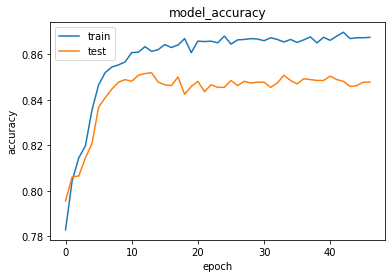

In [32]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc='upper left')
plt.show()

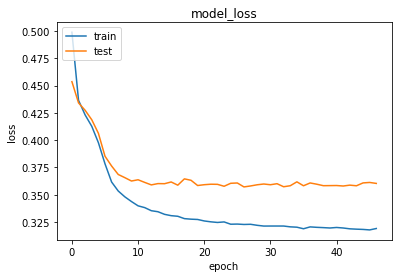

In [33]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc='upper left')
plt.show()

In [34]:
## Making the prediction and evaluating model

# Predicting the Test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [35]:
## making the confusion matrix

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix( y_pred,y_test)
cm

array([[1512,  206],
       [  83,  199]])

In [36]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)
score

0.8555

In [37]:
classifier.get_weights()

[array([[-1.10509299e-01,  7.11047128e-02,  1.82074487e-01,
          2.19498295e-02, -1.22786835e-02,  1.06050730e-01,
         -1.41914502e-01,  1.14680515e-04, -5.14661968e-01,
          1.37383685e-01,  7.16126412e-02],
        [ 4.46808189e-02,  5.16989350e-01,  4.70455922e-02,
         -6.89293683e-01, -2.48232149e-02, -4.12605181e-02,
         -1.09893525e+00, -8.22120439e-03, -1.48689911e-01,
         -7.36736715e-01,  1.25563219e-02],
        [ 3.96582097e-01, -1.36424705e-01,  2.15166658e-01,
          2.62287915e-01,  1.41670540e-01, -5.29096842e-01,
          5.64644575e-01, -2.76171099e-02,  4.22990263e-01,
         -4.19148356e-02, -9.67946723e-02],
        [-4.30006862e-01, -4.55182076e-01,  5.59809566e-01,
          1.04741320e-01,  6.16449296e-01, -1.97101399e-01,
         -6.80313647e-01, -8.22352469e-01, -1.76130906e-01,
         -1.52975004e-02,  1.06531925e-01],
        [-9.16678011e-01,  6.26813650e-01, -4.90889460e-01,
          2.70546880e-02,  9.33901966e-02, -